Data Collection

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"dwikrisda","key":"d41b47fc80e04d06ce6141027f6bc3ad"}'}

In [ ]:
! mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d rkb0023/houserentpredictiondataset

Dataset URL: https://www.kaggle.com/datasets/rkb0023/houserentpredictiondataset
License(s): unknown
 78% 57.0M/72.9M [00:00<00:00, 96.1MB/s]
100% 72.9M/72.9M [00:00<00:00, 121MB/s] 


In [ ]:
!unzip /content/houserentpredictiondataset.zip

Archive:  /content/houserentpredictiondataset.zip
  inflating: houseRent/housePricing.docx  
  inflating: houseRent/housing_train.csv  


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/houseRent/housing_train.csv")
df.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7039061606,https://bham.craigslist.org/apa/d/birmingham-h...,birmingham,https://bham.craigslist.org,1195,apartment,1908,3,2.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00L0L_80pNkyDeG0...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
1,7041970863,https://bham.craigslist.org/apa/d/birmingham-w...,birmingham,https://bham.craigslist.org,1120,apartment,1319,3,2.0,1,...,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/00707_uRrY9CsNMC...,Find Your Way to Haven Apartment Homes Come ho...,33.3755,-86.8045,al
2,7041966914,https://bham.craigslist.org/apa/d/birmingham-g...,birmingham,https://bham.craigslist.org,825,apartment,1133,1,1.5,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00h0h_b7Bdj1NLBi...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
3,7041966936,https://bham.craigslist.org/apa/d/birmingham-f...,birmingham,https://bham.craigslist.org,800,apartment,927,1,1.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00808_6ghZ8tSRQs...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
4,7041966888,https://bham.craigslist.org/apa/d/birmingham-2...,birmingham,https://bham.craigslist.org,785,apartment,1047,2,1.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00y0y_21c0FOvUXm...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al


In [ ]:
df

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7039061606,https://bham.craigslist.org/apa/d/birmingham-h...,birmingham,https://bham.craigslist.org,1195,apartment,1908,3,2.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00L0L_80pNkyDeG0...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
1,7041970863,https://bham.craigslist.org/apa/d/birmingham-w...,birmingham,https://bham.craigslist.org,1120,apartment,1319,3,2.0,1,...,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/00707_uRrY9CsNMC...,Find Your Way to Haven Apartment Homes Come ho...,33.3755,-86.8045,al
2,7041966914,https://bham.craigslist.org/apa/d/birmingham-g...,birmingham,https://bham.craigslist.org,825,apartment,1133,1,1.5,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00h0h_b7Bdj1NLBi...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
3,7041966936,https://bham.craigslist.org/apa/d/birmingham-f...,birmingham,https://bham.craigslist.org,800,apartment,927,1,1.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00808_6ghZ8tSRQs...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
4,7041966888,https://bham.craigslist.org/apa/d/birmingham-2...,birmingham,https://bham.craigslist.org,785,apartment,1047,2,1.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00y0y_21c0FOvUXm...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265185,7050851033,https://columbus.craigslist.org/apa/d/columbus...,columbus,https://columbus.craigslist.org,0,apartment,1061,2,2.0,1,...,0,0,0,w/d in unit,detached garage,https://images.craigslist.org/00m0m_8wP9hX96TZ...,â BERKLEY HOUSE â Voted #1 BEST Communit...,40.0495,-83.0669,oh
265186,7050887997,https://columbus.craigslist.org/apa/d/grove-ci...,columbus,https://columbus.craigslist.org,1069,apartment,1020,2,1.5,1,...,0,0,0,w/d hookups,detached garage,https://images.craigslist.org/00N0N_ioCvFNCv24...,!!!!Tour today and receive $5 Starbucks gift c...,39.8408,-83.0804,oh
265187,7044801015,https://columbus.craigslist.org/apa/d/columbus...,columbus,https://columbus.craigslist.org,1507,apartment,1660,2,1.5,1,...,0,0,0,NaN,NaN,https://images.craigslist.org/00j0j_5EIRWzdHCV...,"The Commons at Olentangy4765 Blairfield Dr, Co...",40.0564,-83.0417,oh
265188,7050885800,https://columbus.craigslist.org/apa/d/newark-l...,columbus,https://columbus.craigslist.org,1001,apartment,1220,3,1.5,1,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00J0J_6VSTqFJb86...,www.McMillenWoods.com www.mcmillenwoods.com ...,40.0451,-82.4564,oh


Data Understanding & Removing Outlier

In [ ]:
df.shape

(265190, 22)

In [ ]:
df.info

<bound method DataFrame.info of                 id                                                url  \
0       7039061606  https://bham.craigslist.org/apa/d/birmingham-h...   
1       7041970863  https://bham.craigslist.org/apa/d/birmingham-w...   
2       7041966914  https://bham.craigslist.org/apa/d/birmingham-g...   
3       7041966936  https://bham.craigslist.org/apa/d/birmingham-f...   
4       7041966888  https://bham.craigslist.org/apa/d/birmingham-2...   
...            ...                                                ...   
265185  7050851033  https://columbus.craigslist.org/apa/d/columbus...   
265186  7050887997  https://columbus.craigslist.org/apa/d/grove-ci...   
265187  7044801015  https://columbus.craigslist.org/apa/d/columbus...   
265188  7050885800  https://columbus.craigslist.org/apa/d/newark-l...   
265189  7050884586  https://columbus.craigslist.org/apa/d/columbus...   

            region                       region_url  price       type  sqfeet  \
0       birmingham      https://bham.craigslist.org   1195  apartment    1908   
1       birmingham      https://bham.craigslist.org   1120  apartment    1319   
2       birmingham      https://bham.craigslist.org    825  apartment    1133   
3       birmingham      https://bham.craigslist.org    800  apartment     927   
4       birmingham      https://bham.craigslist.org    785  apartment    1047   
...            ...                              ...    ...        ...     ...   
265185    columbus  https://columbus.craigslist.org      0  apartment    1061   
265186    columbus  https://columbus.craigslist.org   1069  apartment    1020   
265187    columbus  https://columbus.craigslist.org   1507  apartment    1660   
265188    columbus  https://columbus.craigslist.org   1001  apartment    1220   
265189    columbus  https://columbus.craigslist.org   1164  townhouse    1300   

        beds  baths  cats_allowed  ...  wheelchair_access  \
0          3    2.0             1  ...                  0   
1          3    2.0             1  ...                  0   
2          1    1.5             1  ...                  0   
3          1    1.0             1  ...                  0   
4          2    1.0             1  ...                  0   
...      ...    ...           ...  ...                ...   
265185     2    2.0             1  ...                  0   
265186     2    1.5             1  ...                  0   
265187     2    1.5             1  ...                  0   
265188     3    1.5             1  ...                  0   
265189     2    2.5             1  ...                  0   

        electric_vehicle_charge  comes_furnished  laundry_options  \
0                             0                0  laundry on site   
1                             0                0  laundry on site   
2                             0                0  laundry on site   
3                             0                0  laundry on site   
4                             0                0  laundry on site   
...                         ...              ...              ...   
265185                        0                0      w/d in unit   
265186                        0                0      w/d hookups   
265187                        0                0              NaN   
265188                        0                0      w/d hookups   
265189                        0                0      w/d hookups   

           parking_options                                          image_url  \
0           street parking  https://images.craigslist.org/00L0L_80pNkyDeG0...   
1       off-street parking  https://images.craigslist.org/00707_uRrY9CsNMC...   
2           street parking  https://images.craigslist.org/00h0h_b7Bdj1NLBi...   
3           street parking  https://images.craigslist.org/00808_6ghZ8tSRQs...   
4           street parking  https://images.craigslist.org/00y0y_21c0FOvUXm...   
...                    ...                                            

In [ ]:
df.describe()

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,2.651900e+05,2.651900e+05,2.651900e+05,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,263771.000000,263771.000000
mean,7.040888e+09,1.227285e+04,1.093678e+03,1.912414,1.483468,0.716822,0.696550,0.733896,0.078759,0.014360,0.048644,37.208855,-92.398149
std,8.778930e+06,5.376352e+06,2.306888e+04,3.691900,0.630208,0.450543,0.459749,0.441920,0.269362,0.118968,0.215124,5.659648,17.370780
min,7.003808e+09,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.533300,-163.894000
25%,7.035963e+09,8.170000e+02,7.520000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.508500,-104.704000
50%,7.043109e+09,1.060000e+03,9.500000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,37.984900,-86.478300
75%,7.048362e+09,1.450000e+03,1.156000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.168400,-81.284600
max,7.051263e+09,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.036000,172.633000


EDA - Deskripsi variabel

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265190 entries, 0 to 265189
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       265190 non-null  int64  
 1   url                      265190 non-null  object 
 2   region                   265190 non-null  object 
 3   region_url               265190 non-null  object 
 4   price                    265190 non-null  int64  
 5   type                     265190 non-null  object 
 6   sqfeet                   265190 non-null  int64  
 7   beds                     265190 non-null  int64  
 8   baths                    265190 non-null  float64
 9   cats_allowed             265190 non-null  int64  
 10  dogs_allowed             265190 non-null  int64  
 11  smoking_allowed          265190 non-null  int64  
 12  wheelchair_access        265190 non-null  int64  
 13  electric_vehicle_charge  265190 non-null  int64  
 14  come

In [ ]:
df.describe()

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,2.651900e+05,2.651900e+05,2.651900e+05,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,263771.000000,263771.000000
mean,7.040888e+09,1.227285e+04,1.093678e+03,1.912414,1.483468,0.716822,0.696550,0.733896,0.078759,0.014360,0.048644,37.208855,-92.398149
std,8.778930e+06,5.376352e+06,2.306888e+04,3.691900,0.630208,0.450543,0.459749,0.441920,0.269362,0.118968,0.215124,5.659648,17.370780
min,7.003808e+09,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.533300,-163.894000
25%,7.035963e+09,8.170000e+02,7.520000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.508500,-104.704000
50%,7.043109e+09,1.060000e+03,9.500000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,37.984900,-86.478300
75%,7.048362e+09,1.450000e+03,1.156000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.168400,-81.284600
max,7.051263e+09,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.036000,172.633000


Missing value

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

id                             0
url                            0
region                         0
region_url                     0
price                          0
type                           0
sqfeet                         0
beds                           0
baths                          0
cats_allowed                   0
dogs_allowed                   0
smoking_allowed                0
wheelchair_access              0
electric_vehicle_charge        0
comes_furnished                0
laundry_options            54311
parking_options            95135
image_url                      0
description                    2
lat                         1419
long                        1419
state                          1
dtype: int64


In [ ]:
cleaned_df = df.dropna(axis=1)

In [ ]:
# Mengecek jumlah nilai yang hilang setelah penghapusan
print(cleaned_df.isnull().sum())


id                         0
url                        0
region                     0
region_url                 0
price                      0
type                       0
sqfeet                     0
beds                       0
baths                      0
cats_allowed               0
dogs_allowed               0
smoking_allowed            0
wheelchair_access          0
electric_vehicle_charge    0
comes_furnished            0
image_url                  0
dtype: int64


In [ ]:
# Menghapus kolom "id", "url", dan "region_url"
cleaned_df = cleaned_df.drop(columns=["id", "url", "region_url", "region", "image_url"])

# Menampilkan informasi DataFrame setelah menghapus kolom
print(cleaned_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265190 entries, 0 to 265189
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   price                    265190 non-null  int64  
 1   type                     265190 non-null  object 
 2   sqfeet                   265190 non-null  int64  
 3   beds                     265190 non-null  int64  
 4   baths                    265190 non-null  float64
 5   cats_allowed             265190 non-null  int64  
 6   dogs_allowed             265190 non-null  int64  
 7   smoking_allowed          265190 non-null  int64  
 8   wheelchair_access        265190 non-null  int64  
 9   electric_vehicle_charge  265190 non-null  int64  
 10  comes_furnished          265190 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 22.3+ MB
None


In [ ]:
cleaned_df.shape

(265190, 11)

In [ ]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265190 entries, 0 to 265189
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   price                    265190 non-null  int64  
 1   type                     265190 non-null  object 
 2   sqfeet                   265190 non-null  int64  
 3   beds                     265190 non-null  int64  
 4   baths                    265190 non-null  float64
 5   cats_allowed             265190 non-null  int64  
 6   dogs_allowed             265190 non-null  int64  
 7   smoking_allowed          265190 non-null  int64  
 8   wheelchair_access        265190 non-null  int64  
 9   electric_vehicle_charge  265190 non-null  int64  
 10  comes_furnished          265190 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 22.3+ MB


In [ ]:
cleaned_df

,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished
0,1195,apartment,1908,3,2.0,1,1,1,0,0,0
1,1120,apartment,1319,3,2.0,1,1,1,0,0,0
2,825,apartment,1133,1,1.5,1,1,1,0,0,0
3,800,apartment,927,1,1.0,1,1,1,0,0,0
4,785,apartment,1047,2,1.0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
265185,0,apartment,1061,2,2.0,1,1,1,0,0,0
265186,1069,apartment,1020,2,1.5,1,1,1,0,0,0
265187,1507,apartment,1660,2,1.5,1,1,1,0,0,0
265188,1001,apartment,1220,3,1.5,1,1,1,0,0,0


Univariate Analysis

In [ ]:
cleaned_df.describe()

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished
count,2.651900e+05,2.651900e+05,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000
mean,1.227285e+04,1.093678e+03,1.912414,1.483468,0.716822,0.696550,0.733896,0.078759,0.014360,0.048644
std,5.376352e+06,2.306888e+04,3.691900,0.630208,0.450543,0.459749,0.441920,0.269362,0.118968,0.215124
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.170000e+02,7.520000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.060000e+03,9.500000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.450000e+03,1.156000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
numerical_features = ['price', 'sqfeet', 'beds', 'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed', 'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished']
categorical_features = ['type']

Categorical Features

        price       type  sqfeet  beds  baths  cats_allowed  dogs_allowed  \
0        1195  apartment    1908     3    2.0             1             1   
1        1120  apartment    1319     3    2.0             1             1   
2         825  apartment    1133     1    1.5             1             1   
3         800  apartment     927     1    1.0             1             1   
4         785  apartment    1047     2    1.0             1             1   
...       ...        ...     ...   ...    ...           ...           ...   
265185      0  apartment    1061     2    2.0             1             1   
265186   1069  apartment    1020     2    1.5             1             1   
265187   1507  apartment    1660     2    1.5             1             1   
265188   1001  apartment    1220     3    1.5             1             1   
265189   1164  townhouse    1300     2    2.5             1             1   

        smoking_allowed  wheelchair_access  electric_vehicle_charge  \
0   

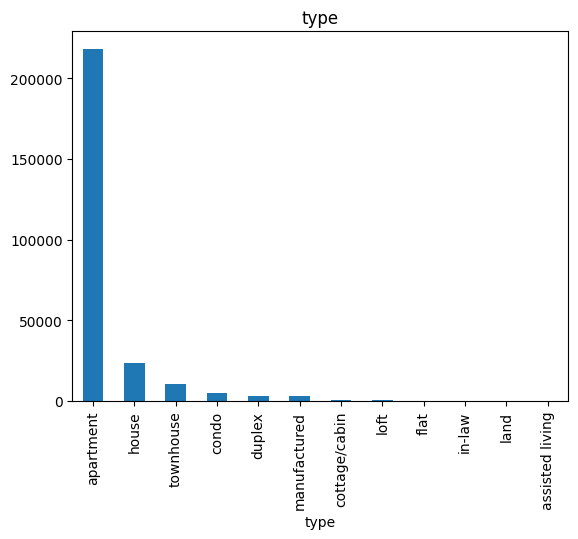

In [ ]:
feature = categorical_features[0]
count = cleaned_df[feature].value_counts()
percent = 100*cleaned_df[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(cleaned_df)
count.plot(kind='bar', title=feature);

Numerical Features

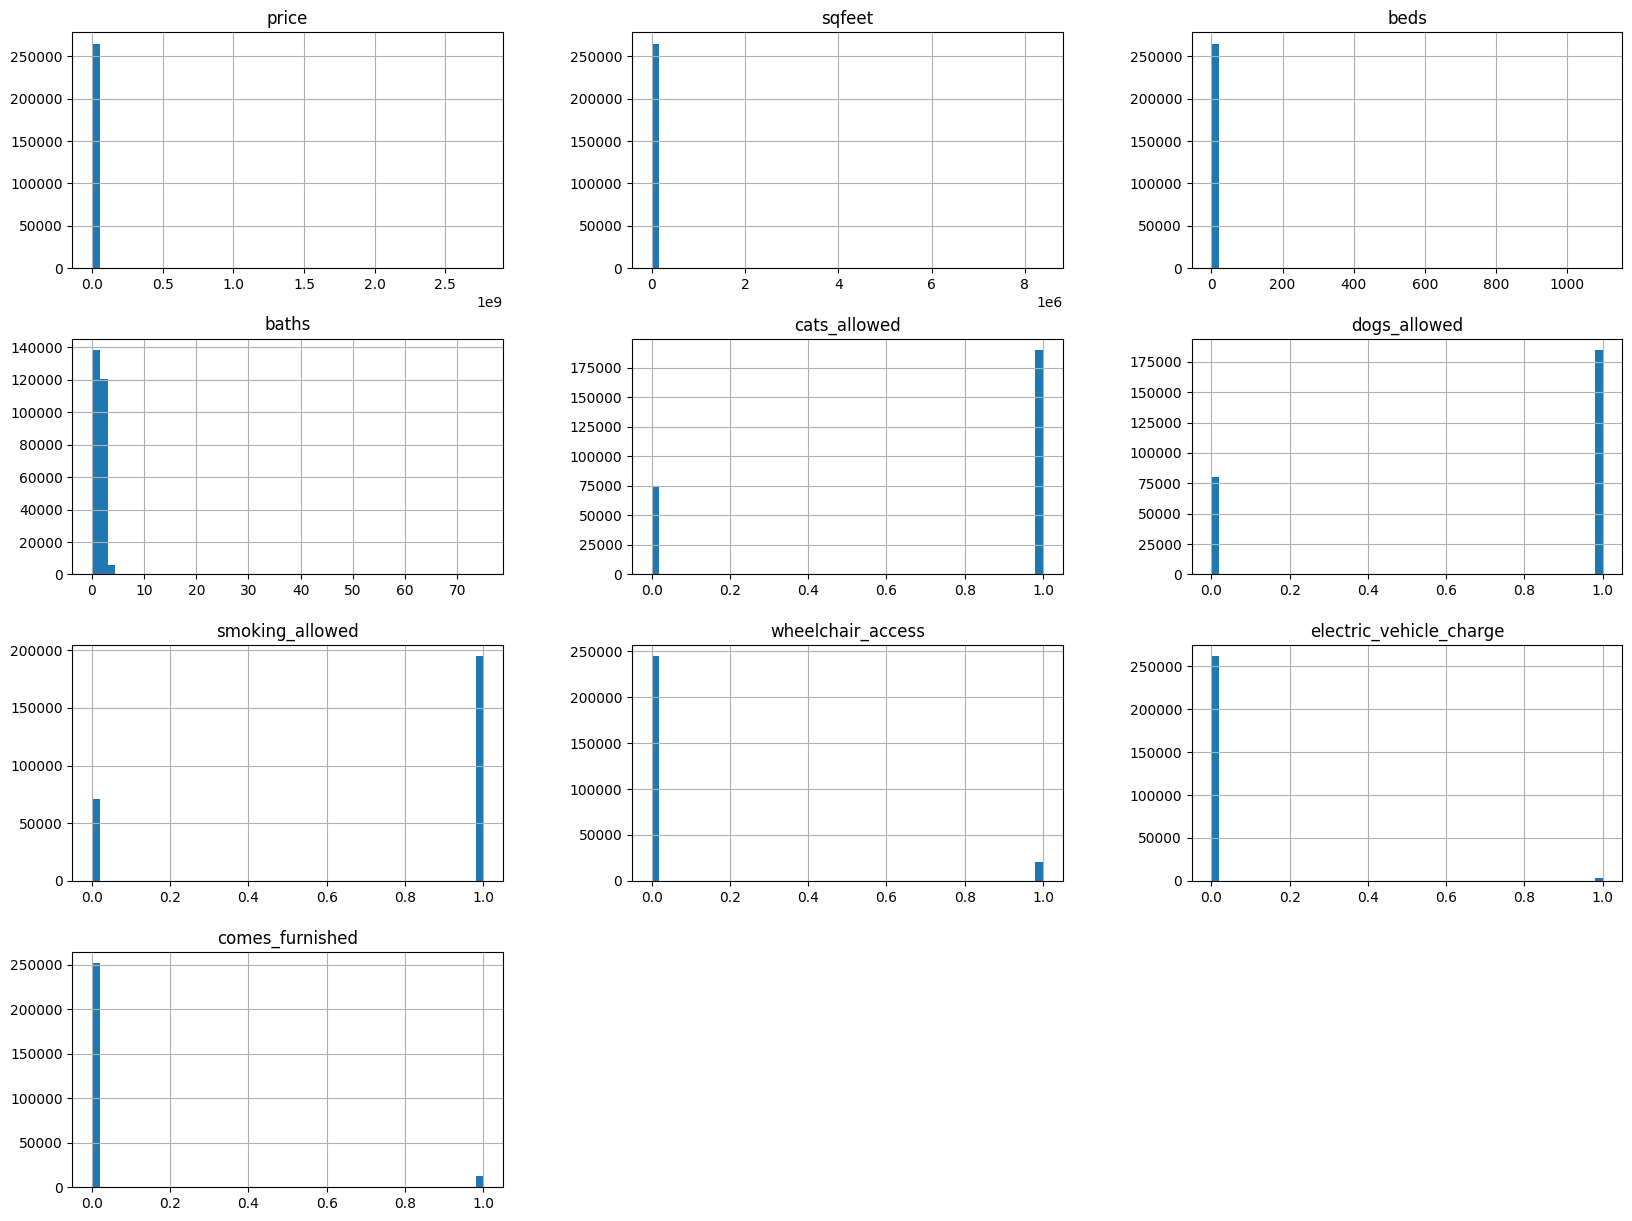

In [ ]:
cleaned_df.hist(bins=50, figsize=(20,15))
plt.show()

Exploratory Data Analysis - Multivariate Analysis

Categorical Features

<ipython-input-77-cc5d8f6d5759>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=cleaned_df, palette="Set3")


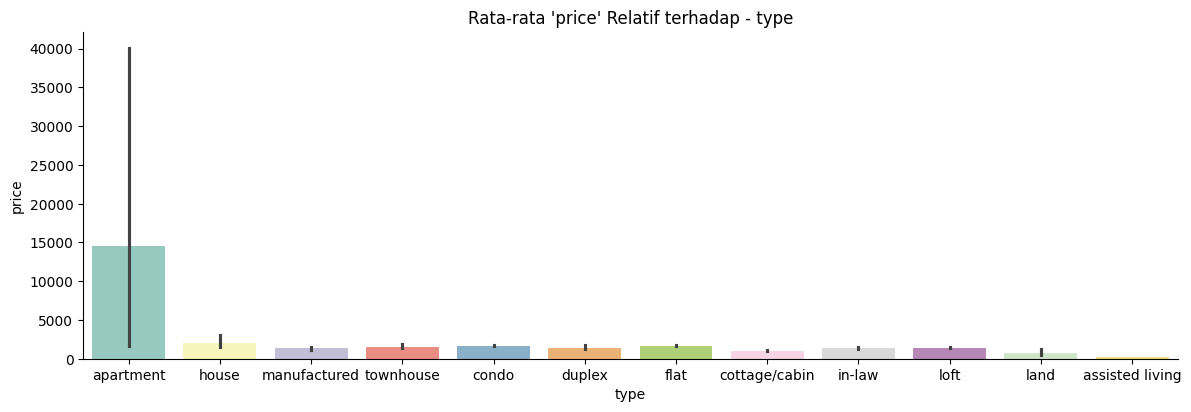

In [ ]:
cat_features = cleaned_df.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=cleaned_df, palette="Set3")
  plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

Numerical Features

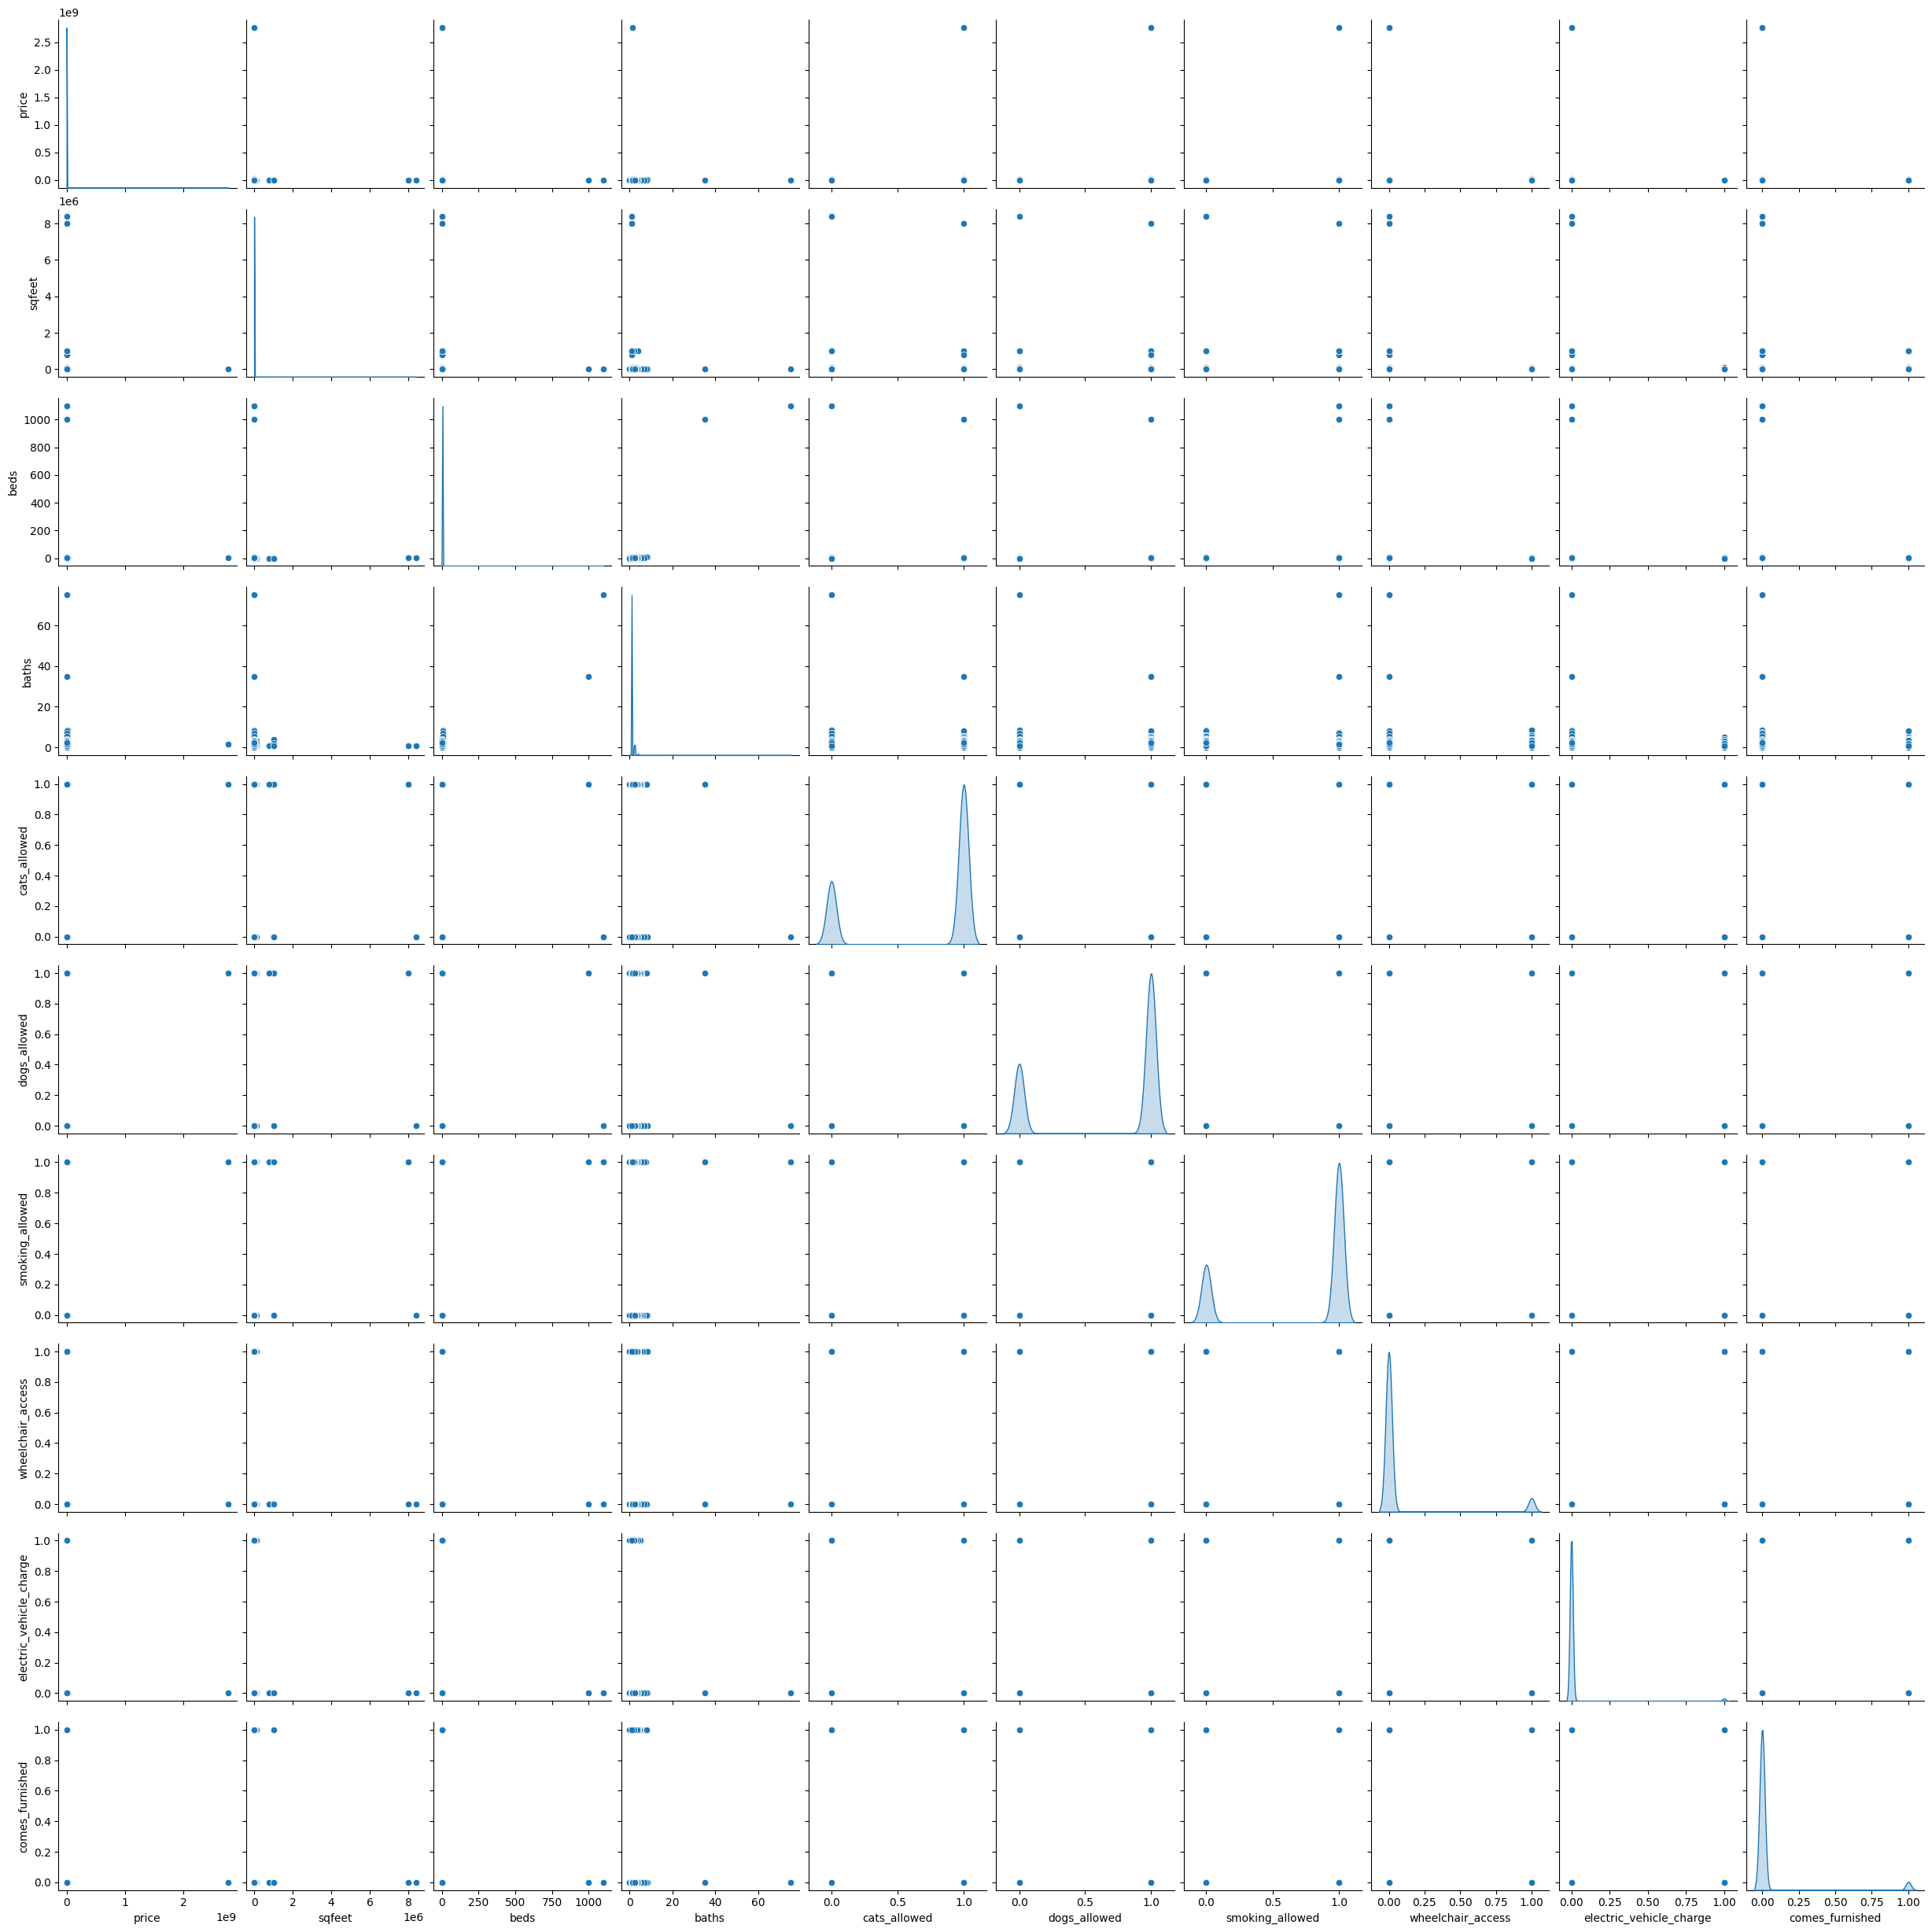

In [ ]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(cleaned_df, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

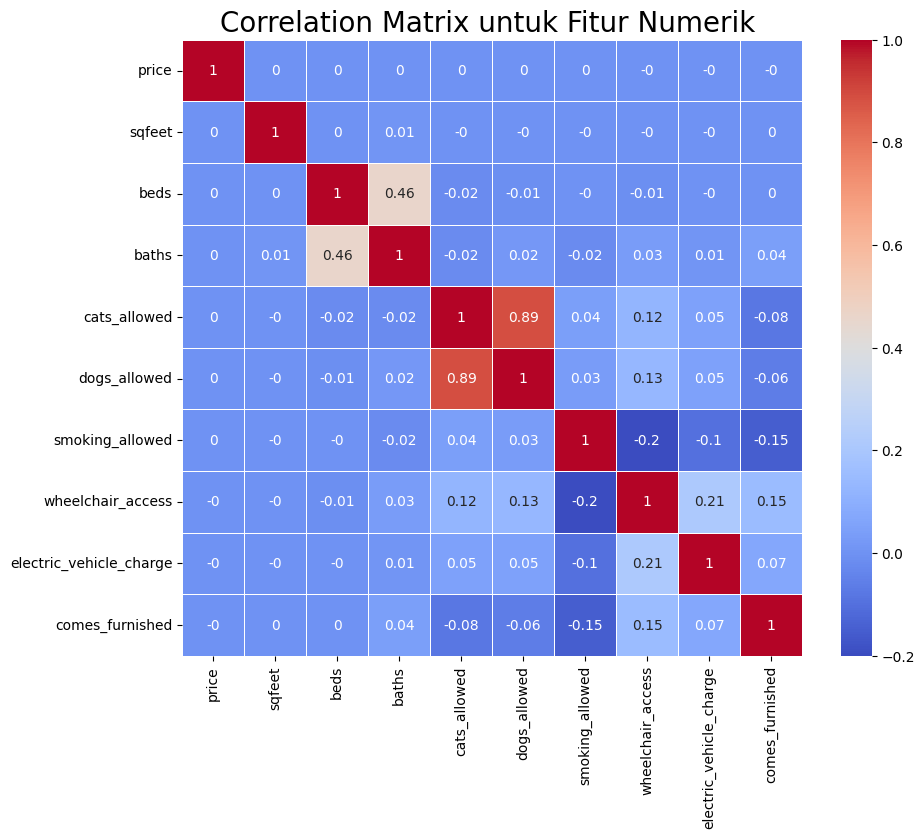

In [ ]:
plt.figure(figsize=(10, 8))
# Mengambil hanya fitur numerik dari DataFrame
# numeric_features = cleaned_df.select_dtypes(include=['int64', 'float64'])

# Menghitung korelasi matriks untuk fitur numerik
correlation_matrix = numeric_features.corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)


Data Preparation



Encoding Fitur Kategori

In [ ]:
from sklearn.preprocessing import  OneHotEncoder
cleaned_df = pd.concat([cleaned_df, pd.get_dummies(cleaned_df['type'], prefix='type')],axis=1)
cleaned_df.drop(['type'], axis=1, inplace=True)
cleaned_df.head()

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,...,type_condo,type_cottage/cabin,type_duplex,type_flat,type_house,type_in-law,type_land,type_loft,type_manufactured,type_townhouse
0,1195,1908,3,2.0,1,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,1120,1319,3,2.0,1,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,825,1133,1,1.5,1,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,800,927,1,1.0,1,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,785,1047,2,1.0,1,1,1,0,0,0,...,False,False,False,False,False,False,False,False,False,False


Reduksi Dimensi dengan PCA

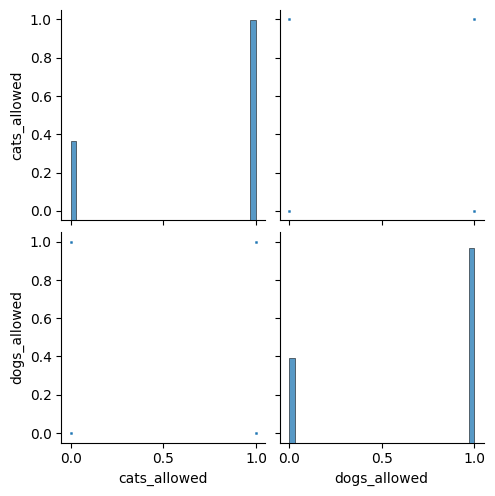

In [ ]:
sns.pairplot(cleaned_df[['cats_allowed','dogs_allowed']], plot_kws={"s": 3});

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=123)
pca.fit(cleaned_df[['cats_allowed','dogs_allowed']])
princ_comp = pca.transform(cleaned_df[['cats_allowed','dogs_allowed']])

In [ ]:
pca.explained_variance_ratio_.round(2)

array([0.94, 0.06])

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA

# Melakukan PCA dengan 1 komponen
pca = PCA(n_components=1, random_state=123)
pca_result = pca.fit_transform(cleaned_df[['cats_allowed', 'dogs_allowed']])

# Membuat DataFrame baru dari hasil transformasi PCA
pca_df = pd.DataFrame(data=pca_result, columns=['animals'], index=cleaned_df.index)

# Menggabungkan DataFrame baru dengan DataFrame asli
cleaned_df = pd.concat([cleaned_df, pca_df], axis=1)

# Menghapus kolom-kolom asli
cleaned_df.drop(['cats_allowed', 'dogs_allowed'], axis=1, inplace=True)

Train-Test-Split

In [ ]:
from sklearn.model_selection import train_test_split

X = cleaned_df.drop(["price"],axis =1)
y = cleaned_df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [ ]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 265190
Total # of sample in train dataset: 238671
Total # of sample in test dataset: 26519


Standarisasi

In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['animals', 'sqfeet', 'beds', 'baths', 'smoking_allowed', 'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,animals,sqfeet,beds,baths,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished
175263,-0.662854,-0.003929,0.022334,-0.760964,0.601998,-0.292707,-0.120357,-0.226348
10224,-0.662854,-0.025012,-0.235359,-0.760964,0.601998,-0.292707,-0.120357,-0.226348
47665,-0.662854,0.008000,0.022334,0.814950,0.601998,-0.292707,-0.120357,-0.226348
99231,-0.662854,-0.015320,0.022334,-0.760964,0.601998,-0.292707,-0.120357,-0.226348
211198,-0.662854,-0.000698,0.022334,0.814950,-1.661135,-0.292707,-0.120357,-0.226348


In [ ]:
X_train[numerical_features].describe().round(1)

,animals,sqfeet,beds,baths,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished
count,238671.0,238671.0,238671.0,238671.0,238671.0,238671.0,238671.0,238671.0
mean,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-0.7,-0.0,-0.5,-2.3,-1.7,-0.3,-0.1,-0.2
25%,-0.7,-0.0,-0.2,-0.8,-1.7,-0.3,-0.1,-0.2
50%,-0.7,-0.0,0.0,-0.8,0.6,-0.3,-0.1,-0.2
75%,1.6,0.0,0.0,0.8,0.6,-0.3,-0.1,-0.2
max,1.6,347.4,283.0,115.9,0.6,3.4,8.3,4.4


Model Development

Model Development dengan K-Nearest Neighbor

In [ ]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

Model Development dengan Random Forest

In [ ]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor

# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

Model Development dengan Boosting Algorithm

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

Evaluasi Model

In [ ]:
from sklearn.preprocessing import StandardScaler

# Mendefinisikan StandardScaler
scaler = StandardScaler()

In [ ]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [ ]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Panggil mse
mse

,train,test
KNN,27300919949.457352,960738.501214
RF,22340979067.296822,458604.857434
Boosting,65426441569.944214,49779899023.228065


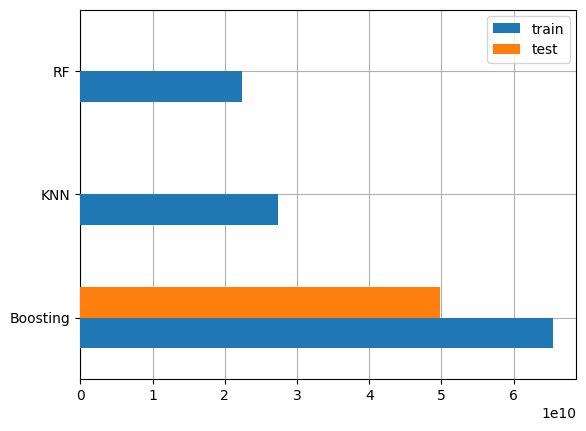

In [ ]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [ ]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
8473,1499,1422.2,1243.7,1508.8
